In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline

#### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
def spin():
    numbers = [0,32,15,19,4,21,2,25,17,34,6,27,13,36,11,30,8,23,10,5,24,16,33,1,20,14,31,9,22,18,29,7,28,12,35,3,26]
    colors = ['green'] + ['red','black']*18
    return random.choice(list(zip(numbers, colors)))

for _ in range(10):
    print(spin())

(32, 'red')
(15, 'black')
(9, 'red')
(10, 'black')
(27, 'red')
(27, 'red')
(13, 'black')
(32, 'red')
(14, 'red')
(27, 'red')


### 2. задание
1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

**Вероятности событий:**
* Четное красное 8/37
* Четное черное 10/37
* Нечетное красное 10/37
* Нечетное черное 8/37
* Зеро зеленое 1/37

Вероятность Четное черное или Нечетное красное 10/37 + 10/37 = 0.54

In [3]:
N = 100000
count = 0
for i in range(N):
    num, col = spin()
    if num%2 == 0 and col=='black':
        count += 1
    if num%2 != 0 and col=='red':
        count += 1
print('Эксперимент:', round((count/N),2))
print('Теор:', round((20/37),2))

Эксперимент: 0.54
Теор: 0.54


2) Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

(array([1., 2., 5., 2.]),
 array([38.  , 46.25, 54.5 , 62.75, 71.  ]),
 <a list of 4 Patch objects>)

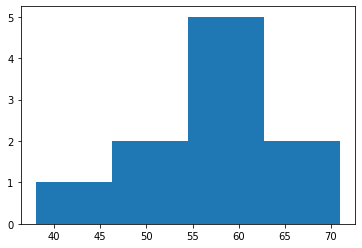

In [4]:
vs = np.random.randint(1,10,100).reshape(10,10)
rand_sum = np.array([v.sum() for v in vs])
plt.hist(rand_sum, bins=4)

### 3. задание
1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [5]:
import itertools

V = 1000000 # количество выборок
N = 10 # длина выборки
K = 5 # количество успехов


def monte_carlo(V,N,S):
    gen = np.random.randint(0,2,N*V).reshape(V,N)
    sums = np.array(list(map(sum, gen))) # суммы успехов по выборкам
    sucs = sums[sums==K].size  # количество выборок с определенным количеством успехов
    return sucs/V

# сочетания
def CNK(N,K):
    return np.math.factorial(N)/(np.math.factorial(K)*np.math.factorial(N-K))

# теоретический расчет
def teor_prob(N,K):    
    return CNK(N,K)*(0.5**K)*(0.5**(N-K))

In [6]:
monte_carlo(V,N,K)

0.246326

In [7]:
teor_prob(N,K)

0.24609375

2)	Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [8]:
teor_prob(10,4)

0.205078125

In [9]:
teor_prob(3,2)

0.375

In [10]:
teor_prob(2,1)

0.5

### 4. Задание 
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [11]:
for i in itertools.permutations('123',3):
    print(''.join(str(x) for x in i))

123
132
213
231
312
321


In [12]:
for i in itertools.permutations('12',2):
    print(''.join(str(x) for x in i))

12
21


### 5. задание

Дополните код расчетом коэффициента корреляции x и y по формуле

In [13]:
def R(x,y):
    x,y  = np.array(x), np.array(y)
    xm, ym = sum(x)/len(x), sum(y)/len(y)
    return sum((x-xm)*(y-ym))/np.sqrt(sum((x-xm)**2)*sum((y-ym)**2))

In [14]:
x=np.array([1,2,3])
y=np.array([4,5,6])
R(x,y)

1.0

In [15]:
x=np.array([9,11,9])
y=np.array([4,5,6])
R(x,y)

0.0

In [16]:
x=np.array([6,5,4])
y=np.array([4,5,6])
R(x,y)

-1.0